___

<a href='https://seaborn.pydata.org/'> <img src='https://algorithmclasses.files.wordpress.com/2020/09/seaborn-logo.png?w=420' /></a>
___

# Gráficos de distribución

Analicemos algunas gráficas que nos permiten visualizar la distribución de un conjunto de datos. Estas graficas son:

* distplot
* jointplot
* pairplot
* rugplot
* kdeplot

___
## Importar

In [1]:
import seaborn as sns
%matplotlib inline

## Datos
¡Seaborn viene con conjuntos de datos integrados!

In [2]:
tips = sns.load_dataset('tips')

In [3]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## distplot

El **distplot** muestra la distribución de un conjunto univariado de observaciones.

* **Gráficos univariados:**
Se refiere al análisis estadístico que opera con datos referentes a una sola variable o distribución de frecuencias y pretende determinar sus propiedades estadísticas.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


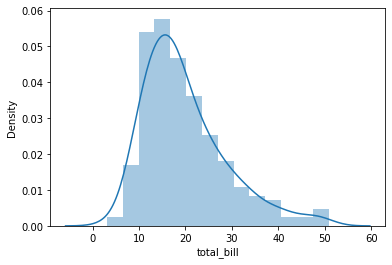

In [4]:
sns.distplot(tips['total_bill'])
# Es seguro ignorar las advertencias

Para eliminar la capa kde y hacer el histograma use:

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


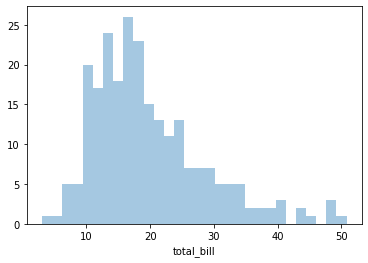

In [5]:
sns.distplot(tips['total_bill'],kde=False,bins=30)

## jointplot

**jointplot()** permite hacer coincidir básicamente dos distplots para datos bivariados. Con su elección de qué tipo de parámetro comparar con **kind**:

* “scatter” 
* “reg” 
* “resid” 
* “kde” 
* “hex”

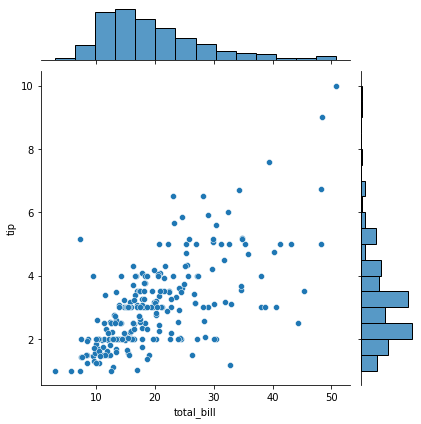

In [6]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='scatter')

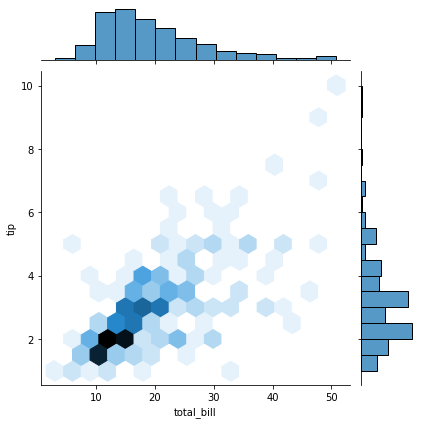

In [7]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='hex')

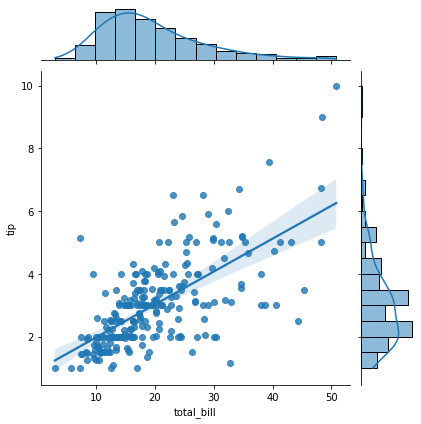

In [8]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='reg')

## pairplot

**pairplot** trazará relaciones por pares en un dataframe completo (para las columnas numéricas) y soporta un argumento de color llamado **hug** (para columnas categóricas).

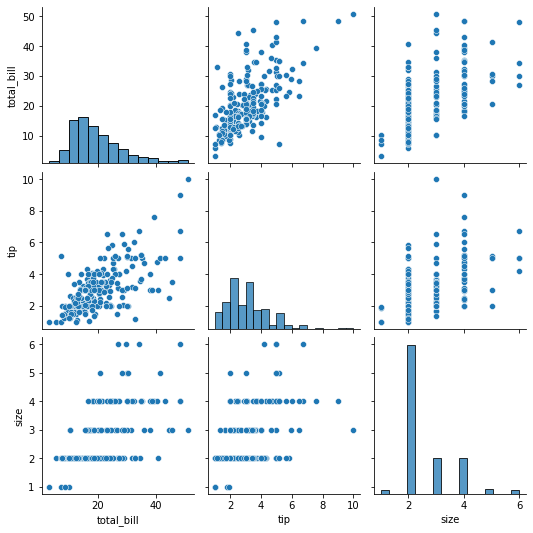

In [9]:
sns.pairplot(tips)

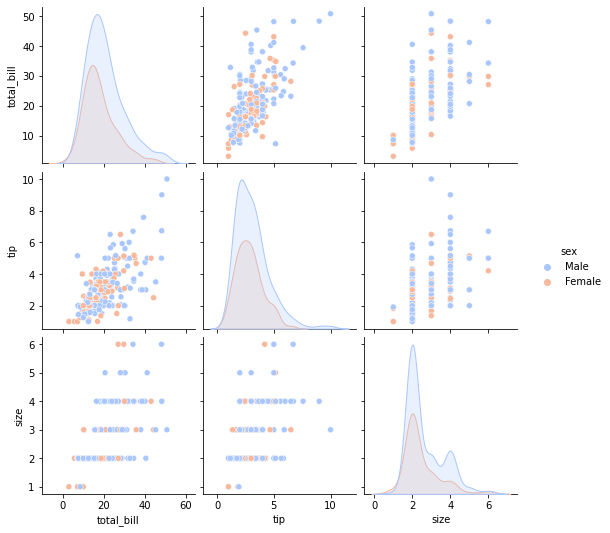

In [10]:
sns.pairplot(tips,hue='sex',palette='coolwarm')

## rugplot

**rugplots** es en realidad un concepto muy sencillo, simplemente se dibuja una marca de guión para cada punto en una distribución univariante.

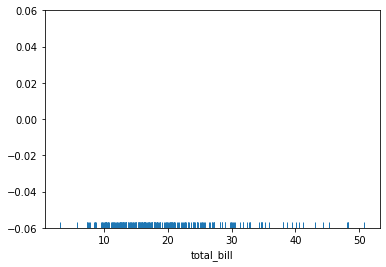

In [11]:
sns.rugplot(tips['total_bill'])

## kdeplot

**kdeplots** son gráficos de estimación de densidad de kernel ([Kernel Density Estimation plots](http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth)). Estos gráficos de KDE reemplazan cada observación con una distribución gaussiana (normal) centrada alrededor de ese valor. Por ejemplo:

(0.0, 1.0)

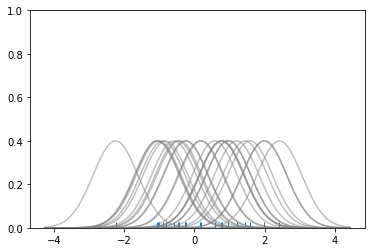

In [20]:
# No te preocupes en entender este codigo!
# Es solo para el diagrama de abajo
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#Crear dataset
dataset = np.random.randn(25)

# Crear otro rugplot
sns.rugplot(dataset);

# Configurar el x-axis para el plot
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 100 puntos igualmente espaciados de x_min a x_max 
x_axis = np.linspace(x_min,x_max,100)

# Configurar el bandwidth, mas informacion aqui:
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2


# Crea una lista kernel vacia
kernel_list = []

# Grafica cada función base
for data_point in dataset:
    
    # Cree un kernel para cada punto y añádalo a la lista
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Escala para graficar
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)

Text(0.5, 0.98, 'Suma de las funciones básicas')

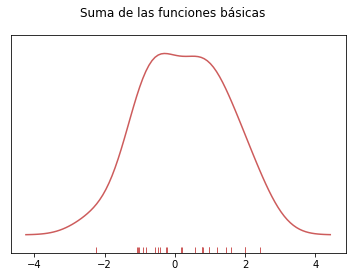

In [21]:
# Para obtener la gráfica kde podemos sumar estas funciones básicas.

# Grafica la suma de la función base
sum_of_kde = np.sum(kernel_list,axis=0)

# Figura de la trama
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# Agregue el rugplot inicial
sns.rugplot(dataset,c = 'indianred')

# Obtener rid desde marcas y-tick 
plt.yticks([])

#Configurar titulo
plt.suptitle("Suma de las funciones básicas")

Entonces, con nuestro conjunto de datos de sugerencias:

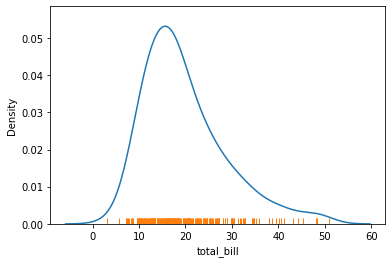

In [22]:
sns.kdeplot(tips['total_bill'])
sns.rugplot(tips['total_bill'])

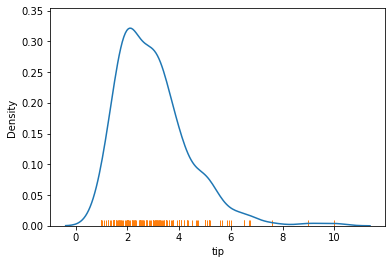

In [23]:
sns.kdeplot(tips['tip'])
sns.rugplot(tips['tip'])

# Buen trabajo!